In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [345]:
#for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# library for PCA
from sklearn.decomposition import PCA

In [346]:
#libraries for ML classification
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

In [347]:
#libraries for classification report
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [348]:
#libraries for roc curve
from sklearn.metrics import roc_curve, roc_auc_score

In [349]:
#dataset from UCI Repository Breast Cancer Wisconsin
from sklearn.datasets import load_breast_cancer


In [350]:
idsdata=load_breast_cancer()


In [352]:
print(idsdata['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [361]:
mydata=pd.DataFrame(idsdata['data'],columns=idsdata['feature_names'])
result=pd.DataFrame(idsdata['target'],columns=["Result"])
r=np.array(result)
mydata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Class distribuion

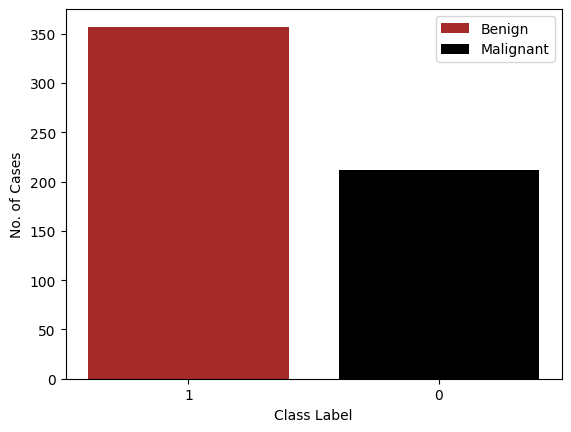

In [362]:
count1=sum(idsdata['target'])
count2=len(idsdata['target'])-count1
plt.bar("1",count1,color='brown',label='Benign')
plt.bar("0",count2,color='black',label='Malignant')
plt.legend()
plt.ylabel("No. of Cases")
plt.xlabel("Class Label")
plt.show()

Some Plots


In [ ]:
#For Looking for outliers 
#BOX PLOTS FOR Each Attribute
mydata2=mydata.copy()
features=[]
mydata2['class']=idsdata['target']
for i in idsdata['feature_names']:
    fig = px.box(mydata2, x=i)   #these are boxplots
    fig.show()
    sns.displot(mydata2, x=i,hue='class')  #these are histograms


   



Pricipal Component Analysis

In [364]:

#
# First we have to standerdize the dataset
scaler=StandardScaler()
scaler.fit(mydata)

scaled_data=scaler.transform(mydata)

mydata3=pd.DataFrame(data=scaled_data[0:,0:],index=[i for i in range(scaled_data.shape[0])],columns=['f'+str(i) for i in range(scaled_data.shape[1])])
print(mydata3.shape)
mydata3




(569, 30)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


PCA Continued

In [365]:
#PCA reduces Number of attributes from 30 to 3
pca=PCA(n_components=3)

pca.fit(scaled_data)

red_data=pca.transform(scaled_data)

In [366]:
mydata4=pd.DataFrame(data=red_data[0:,0:],index=[i for i in range(red_data.shape[0])],columns=['f'+str(i) for i in range(red_data.shape[1])])    #This is our reduced attribute dataset in dataframe type

print("Shape of Data before PCA",mydata3.shape,"\nShape of Data after PCA ",mydata4.shape)
print(mydata4.head(5))

Shape of Data before PCA (569, 30) 
Shape of Data after PCA  (569, 3)
         f0         f1        f2
0  9.192837   1.948583 -1.123166
1  2.387802  -3.768172 -0.529292
2  5.733896  -1.075174 -0.551748
3  7.122953  10.275589 -3.232789
4  3.935302  -1.948072  1.389767


Training and Test Datasets

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(red_data,idsdata['target'],test_size=0.40)

K Nearest Neigbour

Accuracy:  0.9649122807017544 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        81
           1       0.97      0.98      0.97       147

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



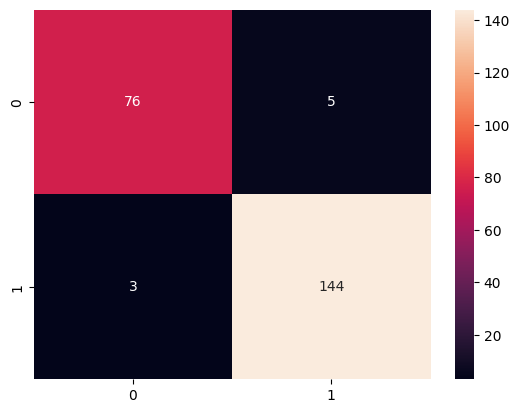

In [380]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)


knn_pred = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,knn_pred), '\n') 
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt="d")
print(classification_report(y_test,knn_pred))



Choosing K value such that error rate can be minimised.

Text(0, 0.5, 'Error Rate')

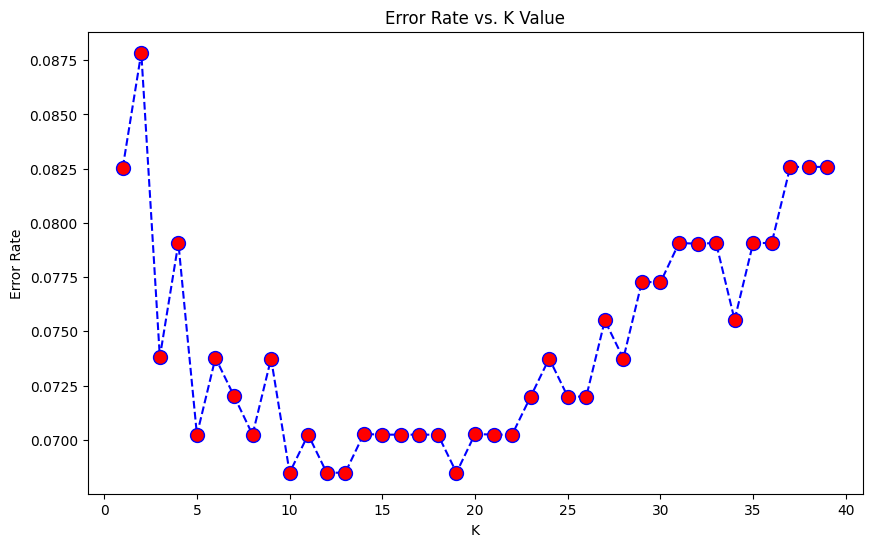

In [381]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,mydata2,idsdata['target'],cv=10)
    error_rate.append(1-score.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Logistic Regression

Accuracy:  0.9532163742690059 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        76
           1       0.93      0.99      0.96        95

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.95      0.95       171

Confusion Matrix: 


<AxesSubplot: >

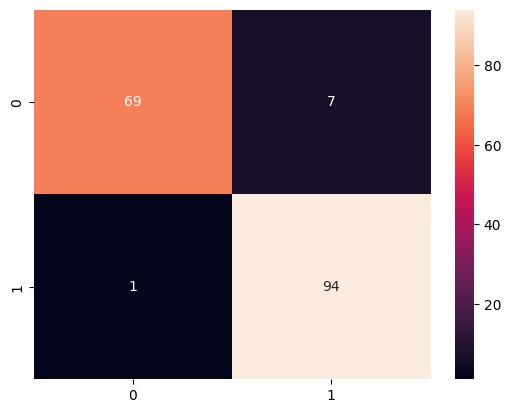

In [370]:

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
#Predict Output
log_pred= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)

logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Accuracy and Classification Report and Confusion Matrix 

print('Accuracy: ', accuracy_score(y_test,log_pred), '\n') 

print('Classification Report: \n',classification_report(y_test,log_pred))

print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,log_pred),annot=True,fmt="d")


SVC

Accuracy:  0.9298245614035088 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        76
           1       0.91      0.97      0.94        95

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



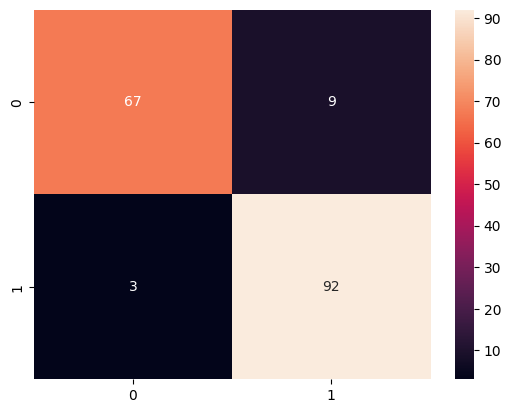

In [371]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,svc_pred), '\n') 
sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True,fmt="d")
print('Classification Report: \n',classification_report(y_test,svc_pred))



K-Fold Cross Validation

In [372]:
from sklearn.model_selection import KFold
model=[KNeighborsClassifier(),SVC(),LogisticRegression()]
kfold_validation=KFold(10)
import numpy as np
from sklearn.model_selection import cross_val_score
for i in model:
    print('\nModel Name: ',i)
    results=cross_val_score(i,red_data,result.values.ravel(),cv=kfold_validation)
    for j in range(10):
        print(j+1,'th fold accuracy: ',results[j])
    print('Average Accuracy:', np.mean(results))


Model Name:  KNeighborsClassifier()
1 th fold accuracy:  0.9122807017543859
2 th fold accuracy:  0.8947368421052632
3 th fold accuracy:  0.9473684210526315
4 th fold accuracy:  0.9298245614035088
5 th fold accuracy:  0.9122807017543859
6 th fold accuracy:  0.9649122807017544
7 th fold accuracy:  0.9824561403508771
8 th fold accuracy:  0.9649122807017544
9 th fold accuracy:  0.9473684210526315
10 th fold accuracy:  0.9285714285714286
Average Accuracy: 0.9384711779448622

Model Name:  SVC()
1 th fold accuracy:  0.9122807017543859
2 th fold accuracy:  0.8421052631578947
3 th fold accuracy:  0.9122807017543859
4 th fold accuracy:  0.9473684210526315
5 th fold accuracy:  0.9473684210526315
6 th fold accuracy:  0.9649122807017544
7 th fold accuracy:  0.9824561403508771
8 th fold accuracy:  0.9649122807017544
9 th fold accuracy:  0.9473684210526315
10 th fold accuracy:  0.9464285714285714
Average Accuracy: 0.9367481203007518

Model Name:  LogisticRegression()
1 th fold accuracy:  0.929824561

ROC Curves

roc_auc_score for K-Nearest Neighbors (k=5):  0.9858685296919657
roc_auc_score for Logistic Regression:  0.989838043823436
roc_auc_score for Support Vector Classifier:  0.5




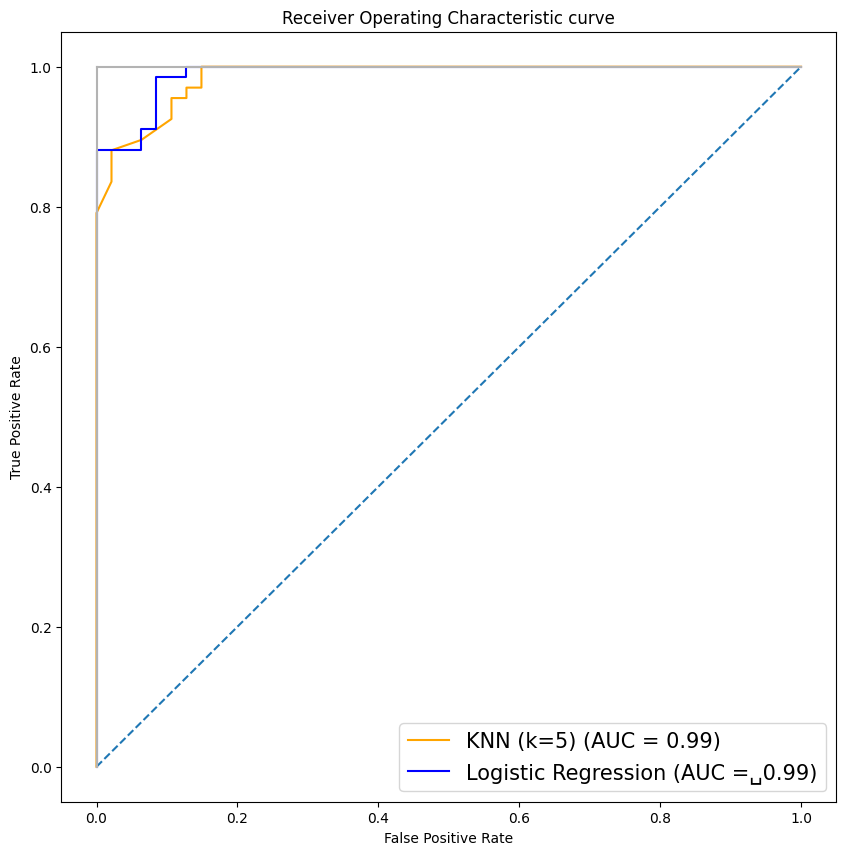

In [373]:
#preparing test and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(red_data,idsdata['target'],test_size=0.2, random_state=0)

svc=SVC()
# #Training model
knn.fit(X_train1, y_train1) #knn
logreg.fit(X_train1, y_train1) #logistic regression
svc.fit(X_train1, y_train1) #SVC 


# #finding predicted probabilities
y_score1 = knn.predict_proba(X_test1)[:,1] 
y_score2= logreg.predict_proba(X_test1)[:,1]
y_score3=svc._dense_predict_proba(X_test1)[:,1]

fpr1, tpr1, threshold1 = roc_curve(y_test1, y_score1) 
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_score2) 
fpr3, tpr3, threshold3 = roc_curve(y_test1, y_score3) 
print('roc_auc_score for K-Nearest Neighbors (k=5): ',roc_auc_score(y_test1, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1,y_score2)) 
print('roc_auc_score for Support Vector Classifier: ', roc_auc_score(y_test1,y_score3))
print('\n')

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic curve')
plt.plot(fpr1, tpr1, color='orange', label='KNN (k=5) (AUC = {1:0.2f})'''.format(2, roc_auc_score(y_test1, y_score1)))
plt.plot(fpr2, tpr2, color='blue', label='Logistic Regression (AUC =␣{1:0.2f})'''.format(2, roc_auc_score(y_test1, y_score2))) 
plt.plot([0,1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(prop={'size': 15})
plt.show()
